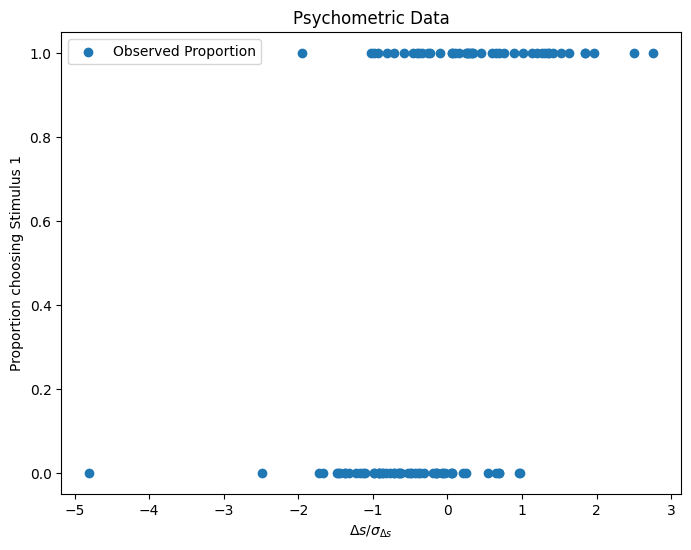

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the experiment results file
results_df = pd.read_csv("experiment_results.csv")

# Calculate Δs and σ_Δs for each trial
results_df['delta_s'] = results_df['Stimulus 1 Value'] - results_df['Stimulus 2 Value']
results_df['sigma_delta_s'] = np.sqrt(results_df['Stimulus 1 Std']**2 + results_df['Stimulus 2 Std']**2)
results_df['delta_s_normalized'] = results_df['delta_s'] / results_df['sigma_delta_s']

# Calculate observed proportions of choosing Stimulus 1 for each delta_s_normalized bin
psychometric_data = results_df.groupby('delta_s_normalized')['Comparison Result'].mean().reset_index()

# Plot psychometric data
plt.figure(figsize=(8, 6))
plt.scatter(psychometric_data['delta_s_normalized'], psychometric_data['Comparison Result'], label="Observed Proportion")
plt.xlabel(r'$\Delta s / \sigma_{\Delta s}$')
plt.ylabel('Proportion choosing Stimulus 1')
plt.title('Psychometric Data')
plt.legend()
plt.show()
